In [3]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
np.set_printoptions(precision=4)
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [4]:
data = pd.read_csv("dataChecked.csv") 
data.head()

,Length,Height (left),Height (right),Inner Frame (lower),Inner Frame (upper),Diagonal,Genuine
0,214.8,131.0,131.1,9.0,9.7,141.0,y
1,214.6,129.7,129.7,8.1,9.5,141.7,y
2,214.8,129.7,129.7,8.7,9.6,142.2,y
3,214.8,129.7,129.6,7.5,10.4,142.0,y
4,215.0,129.6,129.7,10.4,7.7,141.8,y


In [5]:
X = data.iloc[:, 0:6]
y = data.iloc[:, 6]

In [6]:
X.head()

,Length,Height (left),Height (right),Inner Frame (lower),Inner Frame (upper),Diagonal
0,214.8,131.0,131.1,9.0,9.7,141.0
1,214.6,129.7,129.7,8.1,9.5,141.7
2,214.8,129.7,129.7,8.7,9.6,142.2
3,214.8,129.7,129.6,7.5,10.4,142.0
4,215.0,129.6,129.7,10.4,7.7,141.8


In [7]:
y.head()

0    y
1    y
2    y
3    y
4    y
Name: Genuine, dtype: object

In [8]:
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)
lda.explained_variance_ratio_

array([1.])

In [9]:
df = X.join(pd.Series(y, name='class'))
le = LabelEncoder()
y = le.fit_transform(df['class'])

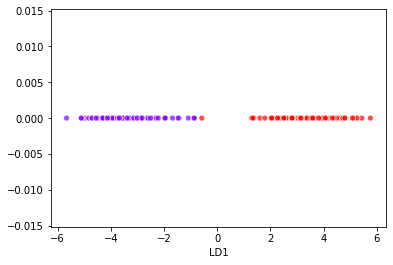

In [10]:
plt.xlabel('LD1')
plt.scatter(
    X_lda[:,0],
    np.zeros(200),
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='w'
)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, random_state=1)

In [10]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[23,  0],
       [ 1, 26]], dtype=int64)

In [11]:
tickets = [[215.1, 130.0, 129.8 ,9.1 ,10.2, 141.5 ],
          [214.7 ,130.7 ,130.8, 11.2 ,11.2, 139.4],
          [214.3, 129.9, 129.9 ,10.2, 11.5 ,139.6 ],
          [214.7 ,130.0 ,129.4 ,7.8, 10.0 ,141.2 ]]
predictions = lda.predict(tickets)
predictions

array(['y', 'n', 'n', 'y'], dtype='<U1')